# Train RetinaNet (Backbone = ResNet50)

In [1]:
import tensorflow as tf
import numpy as np
from keras_retinanet import models
from keras_retinanet.preprocessing.csv_generator import CSVGenerator
from keras_retinanet.utils.transform import random_transform_generator
from keras_retinanet.utils.image import random_visual_effect_generator
from train_retinanet import create_models, create_callbacks, plot_history

In [2]:
np.random.seed(1) 
tf.random.set_seed(1)

In [3]:
tf.test.is_built_with_cuda()  

True

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) #print no of GPU device

Num GPUs Available:  1


In [5]:
backbone = models.backbone('resnet50')
weights = backbone.download_imagenet()

In [6]:
train_generator = CSVGenerator(
    csv_data_file='./dataset/train.csv',
    csv_class_file='./dataset/class.csv',
    no_resize = True,
    preprocess_image  = backbone.preprocess_image
)

val_generator = CSVGenerator(
    csv_data_file='./dataset/validation.csv',
    csv_class_file='./dataset/class.csv',
    no_resize = True,
    preprocess_image  = backbone.preprocess_image
)

In [7]:
lr = 1e-3
epochs = 50
steps = 400

## Without Data Augmentation

In [8]:
training_model, prediction_model = create_models(backbone_retinanet=backbone.retinanet,
                                          num_classes=1,
                                          weights=weights,
                                          freeze_backbone=True,
                                          lr=lr
                                          )

In [9]:
log_file = './result/retinanet_resnet50_log.csv'
model_path = './result/retinanet_resnet50.h5'
callback = create_callbacks(training_model, prediction_model, val_generator, model_path, log_file)

In [10]:
prediction_model.summary()

Model: "retinanet-bbox"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (Activation)         (None, None, None, 6 0           bn_conv1[0][0]                   
_____________________________________________________________________________________

In [11]:
training_model.summary()

Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (Activation)         (None, None, None, 6 0           bn_conv1[0][0]                   
__________________________________________________________________________________________

In [12]:
history = training_model.fit(
                x=train_generator,
                epochs=epochs,
                verbose=1,
                validation_data=val_generator,
                callbacks=callback,
                steps_per_epoch = steps
                )

Epoch 1/50
400/400 [==============================] - ETA: 0s - loss: 3.4265 - regression_loss: 2.5901 - classification_loss: 0.8364WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0080s vs `on_test_batch_end` time: 0.0250s). Check your callbacks.


Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:10 Time:  0:00:10
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.2112
mAP: 0.2112

Epoch 00001: mAP improved from -inf to 0.21122, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 46s 115ms/step - loss: 3.4265 - regression_loss: 2.5901 - classification_loss: 0.8364 - val_loss: 3.0248 - val_regression_loss: 2.5626 - val_classification_loss: 0.4623
Epoch 2/50
400/400 [==============================] - ETA: 0s - loss: 3.1505 - regression_loss: 2.2043 - classification_loss: 0.9462

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.0000
mAP: 0.0000

Epoch 00002: mAP did not improve from 0.21122
400/400 [==============================] - 41s 103ms/step - loss: 3.1505 - regression_loss: 2.2043 - classification_loss: 0.9462 - val_loss: 3.1929 - val_regression_loss: 2.1183 - val_classification_loss: 1.0746
Epoch 3/50
400/400 [==============================] - ETA: 0s - loss: 2.8380 - regression_loss: 1.9018 - classification_loss: 0.9362

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.2511
mAP: 0.2511

Epoch 00003: mAP improved from 0.21122 to 0.25107, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 43s 107ms/step - loss: 2.8380 - regression_loss: 1.9018 - classification_loss: 0.9362 - val_loss: 2.6059 - val_regression_loss: 1.8438 - val_classification_loss: 0.7621
Epoch 4/50
400/400 [==============================] - ETA: 0s - loss: 2.2752 - regression_loss: 1.6780 - classification_loss: 0.5972

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.5929
mAP: 0.5929

Epoch 00004: mAP improved from 0.25107 to 0.59289, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 44s 109ms/step - loss: 2.2752 - regression_loss: 1.6780 - classification_loss: 0.5972 - val_loss: 2.0683 - val_regression_loss: 1.6020 - val_classification_loss: 0.4663
Epoch 5/50
400/400 [==============================] - ETA: 0s - loss: 1.9598 - regression_loss: 1.5348 - classification_loss: 0.4250

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.6966
mAP: 0.6966

Epoch 00005: mAP improved from 0.59289 to 0.69663, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 44s 111ms/step - loss: 1.9598 - regression_loss: 1.5348 - classification_loss: 0.4250 - val_loss: 1.8226 - val_regression_loss: 1.4827 - val_classification_loss: 0.3399
Epoch 6/50
400/400 [==============================] - ETA: 0s - loss: 1.7409 - regression_loss: 1.3956 - classification_loss: 0.3453

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7124
mAP: 0.7124

Epoch 00006: mAP improved from 0.69663 to 0.71235, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 44s 110ms/step - loss: 1.7409 - regression_loss: 1.3956 - classification_loss: 0.3453 - val_loss: 1.7552 - val_regression_loss: 1.4366 - val_classification_loss: 0.3186
Epoch 7/50
400/400 [==============================] - ETA: 0s - loss: 1.6129 - regression_loss: 1.2973 - classification_loss: 0.3156

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7263
mAP: 0.7263

Epoch 00007: mAP improved from 0.71235 to 0.72627, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 43s 108ms/step - loss: 1.6129 - regression_loss: 1.2973 - classification_loss: 0.3156 - val_loss: 1.7191 - val_regression_loss: 1.4170 - val_classification_loss: 0.3021
Epoch 8/50
400/400 [==============================] - ETA: 0s - loss: 1.4345 - regression_loss: 1.1649 - classification_loss: 0.2697

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7501
mAP: 0.7501

Epoch 00008: mAP improved from 0.72627 to 0.75010, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 44s 109ms/step - loss: 1.4345 - regression_loss: 1.1649 - classification_loss: 0.2697 - val_loss: 1.6613 - val_regression_loss: 1.3703 - val_classification_loss: 0.2910
Epoch 9/50
400/400 [==============================] - ETA: 0s - loss: 1.3571 - regression_loss: 1.1065 - classification_loss: 0.2506

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7786
mAP: 0.7786

Epoch 00009: mAP improved from 0.75010 to 0.77856, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 43s 108ms/step - loss: 1.3571 - regression_loss: 1.1065 - classification_loss: 0.2506 - val_loss: 1.5713 - val_regression_loss: 1.3018 - val_classification_loss: 0.2695
Epoch 10/50
400/400 [==============================] - ETA: 0s - loss: 1.2124 - regression_loss: 0.9941 - classification_loss: 0.2183

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7804
mAP: 0.7804

Epoch 00010: mAP improved from 0.77856 to 0.78038, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 43s 108ms/step - loss: 1.2124 - regression_loss: 0.9941 - classification_loss: 0.2183 - val_loss: 1.5461 - val_regression_loss: 1.2898 - val_classification_loss: 0.2563
Epoch 11/50
400/400 [==============================] - ETA: 0s - loss: 1.1698 - regression_loss: 0.9583 - classification_loss: 0.2115

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7966
mAP: 0.7966

Epoch 00011: mAP improved from 0.78038 to 0.79660, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 43s 107ms/step - loss: 1.1698 - regression_loss: 0.9583 - classification_loss: 0.2115 - val_loss: 1.4099 - val_regression_loss: 1.1396 - val_classification_loss: 0.2702
Epoch 12/50
400/400 [==============================] - ETA: 0s - loss: 1.1686 - regression_loss: 0.9716 - classification_loss: 0.1970

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8053
mAP: 0.8053

Epoch 00012: mAP improved from 0.79660 to 0.80526, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 43s 106ms/step - loss: 1.1686 - regression_loss: 0.9716 - classification_loss: 0.1970 - val_loss: 1.3542 - val_regression_loss: 1.1168 - val_classification_loss: 0.2375
Epoch 13/50
400/400 [==============================] - ETA: 0s - loss: 1.0864 - regression_loss: 0.9000 - classification_loss: 0.1864

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8065
mAP: 0.8065

Epoch 00013: mAP improved from 0.80526 to 0.80650, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 105ms/step - loss: 1.0864 - regression_loss: 0.9000 - classification_loss: 0.1864 - val_loss: 1.3361 - val_regression_loss: 1.0836 - val_classification_loss: 0.2525
Epoch 14/50
400/400 [==============================] - ETA: 0s - loss: 1.0103 - regression_loss: 0.8356 - classification_loss: 0.1748

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8070
mAP: 0.8070

Epoch 00014: mAP improved from 0.80650 to 0.80704, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 106ms/step - loss: 1.0103 - regression_loss: 0.8356 - classification_loss: 0.1748 - val_loss: 1.4357 - val_regression_loss: 1.1671 - val_classification_loss: 0.2686
Epoch 15/50
400/400 [==============================] - ETA: 0s - loss: 0.8672 - regression_loss: 0.7180 - classification_loss: 0.1493

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8110
mAP: 0.8110

Epoch 00015: mAP improved from 0.80704 to 0.81100, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 105ms/step - loss: 0.8672 - regression_loss: 0.7180 - classification_loss: 0.1493 - val_loss: 1.3031 - val_regression_loss: 1.0647 - val_classification_loss: 0.2384
Epoch 16/50
400/400 [==============================] - ETA: 0s - loss: 0.8983 - regression_loss: 0.7495 - classification_loss: 0.1488

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8112
mAP: 0.8112

Epoch 00016: mAP improved from 0.81100 to 0.81119, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 106ms/step - loss: 0.8983 - regression_loss: 0.7495 - classification_loss: 0.1488 - val_loss: 1.3272 - val_regression_loss: 1.0863 - val_classification_loss: 0.2409
Epoch 17/50
400/400 [==============================] - ETA: 0s - loss: 0.7837 - regression_loss: 0.6469 - classification_loss: 0.1368

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8136
mAP: 0.8136

Epoch 00017: mAP improved from 0.81119 to 0.81357, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 105ms/step - loss: 0.7837 - regression_loss: 0.6469 - classification_loss: 0.1368 - val_loss: 1.3481 - val_regression_loss: 1.1044 - val_classification_loss: 0.2437
Epoch 18/50
400/400 [==============================] - ETA: 0s - loss: 0.7608 - regression_loss: 0.6346 - classification_loss: 0.1262

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8272
mAP: 0.8272

Epoch 00018: mAP improved from 0.81357 to 0.82720, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 106ms/step - loss: 0.7608 - regression_loss: 0.6346 - classification_loss: 0.1262 - val_loss: 1.2682 - val_regression_loss: 1.0275 - val_classification_loss: 0.2407
Epoch 19/50
400/400 [==============================] - ETA: 0s - loss: 0.7575 - regression_loss: 0.6406 - classification_loss: 0.1169

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8332
mAP: 0.8332

Epoch 00019: mAP improved from 0.82720 to 0.83322, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 105ms/step - loss: 0.7575 - regression_loss: 0.6406 - classification_loss: 0.1169 - val_loss: 1.2914 - val_regression_loss: 1.0384 - val_classification_loss: 0.2530
Epoch 20/50
400/400 [==============================] - ETA: 0s - loss: 0.7085 - regression_loss: 0.5900 - classification_loss: 0.1185

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8400
mAP: 0.8400

Epoch 00020: mAP improved from 0.83322 to 0.84000, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 105ms/step - loss: 0.7085 - regression_loss: 0.5900 - classification_loss: 0.1185 - val_loss: 1.2458 - val_regression_loss: 1.0084 - val_classification_loss: 0.2374
Epoch 21/50
400/400 [==============================] - ETA: 0s - loss: 0.6983 - regression_loss: 0.5842 - classification_loss: 0.1141

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8431
mAP: 0.8431

Epoch 00021: mAP improved from 0.84000 to 0.84311, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 105ms/step - loss: 0.6983 - regression_loss: 0.5842 - classification_loss: 0.1141 - val_loss: 1.2224 - val_regression_loss: 0.9968 - val_classification_loss: 0.2256
Epoch 22/50
400/400 [==============================] - ETA: 0s - loss: 0.6510 - regression_loss: 0.5454 - classification_loss: 0.1056

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8419
mAP: 0.8419

Epoch 00022: mAP did not improve from 0.84311
400/400 [==============================] - 41s 101ms/step - loss: 0.6510 - regression_loss: 0.5454 - classification_loss: 0.1056 - val_loss: 1.2143 - val_regression_loss: 0.9866 - val_classification_loss: 0.2277
Epoch 23/50
400/400 [==============================] - ETA: 0s - loss: 0.6015 - regression_loss: 0.5048 - classification_loss: 0.0967

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8406
mAP: 0.8406

Epoch 00023: mAP did not improve from 0.84311
400/400 [==============================] - 41s 101ms/step - loss: 0.6015 - regression_loss: 0.5048 - classification_loss: 0.0967 - val_loss: 1.2426 - val_regression_loss: 1.0129 - val_classification_loss: 0.2297
Epoch 24/50
400/400 [==============================] - ETA: 0s - loss: 0.5971 - regression_loss: 0.5017 - classification_loss: 0.0955

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8530
mAP: 0.8530

Epoch 00024: mAP improved from 0.84311 to 0.85300, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 106ms/step - loss: 0.5971 - regression_loss: 0.5017 - classification_loss: 0.0955 - val_loss: 1.2146 - val_regression_loss: 0.9844 - val_classification_loss: 0.2301
Epoch 25/50
400/400 [==============================] - ETA: 0s - loss: 0.5265 - regression_loss: 0.4446 - classification_loss: 0.0819

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8550
mAP: 0.8550

Epoch 00025: mAP improved from 0.85300 to 0.85502, saving model to ./result\retinanet_resnet50.h5
400/400 [==============================] - 42s 105ms/step - loss: 0.5265 - regression_loss: 0.4446 - classification_loss: 0.0819 - val_loss: 1.1877 - val_regression_loss: 0.9664 - val_classification_loss: 0.2213
Epoch 26/50
400/400 [==============================] - ETA: 0s - loss: 0.5054 - regression_loss: 0.4269 - classification_loss: 0.0785

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8446
mAP: 0.8446

Epoch 00026: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.5054 - regression_loss: 0.4269 - classification_loss: 0.0785 - val_loss: 1.1929 - val_regression_loss: 0.9583 - val_classification_loss: 0.2345
Epoch 27/50
400/400 [==============================] - ETA: 0s - loss: 0.5013 - regression_loss: 0.4124 - classification_loss: 0.0889

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8459
mAP: 0.8459

Epoch 00027: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.5013 - regression_loss: 0.4124 - classification_loss: 0.0889 - val_loss: 1.1873 - val_regression_loss: 0.9594 - val_classification_loss: 0.2278
Epoch 28/50
400/400 [==============================] - ETA: 0s - loss: 0.4329 - regression_loss: 0.3685 - classification_loss: 0.0644

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8472
mAP: 0.8472

Epoch 00028: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.4329 - regression_loss: 0.3685 - classification_loss: 0.0644 - val_loss: 1.1489 - val_regression_loss: 0.9169 - val_classification_loss: 0.2321
Epoch 29/50
400/400 [==============================] - ETA: 0s - loss: 0.4299 - regression_loss: 0.3687 - classification_loss: 0.0612

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8358
mAP: 0.8358

Epoch 00029: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.4299 - regression_loss: 0.3687 - classification_loss: 0.0612 - val_loss: 1.1613 - val_regression_loss: 0.9160 - val_classification_loss: 0.2453
Epoch 30/50
400/400 [==============================] - ETA: 0s - loss: 0.4353 - regression_loss: 0.3660 - classification_loss: 0.0692

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8369
mAP: 0.8369

Epoch 00030: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.4353 - regression_loss: 0.3660 - classification_loss: 0.0692 - val_loss: 1.1776 - val_regression_loss: 0.9299 - val_classification_loss: 0.2478
Epoch 31/50
400/400 [==============================] - ETA: 0s - loss: 0.4103 - regression_loss: 0.3442 - classification_loss: 0.0661

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8406
mAP: 0.8406

Epoch 00031: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.4103 - regression_loss: 0.3442 - classification_loss: 0.0661 - val_loss: 1.1535 - val_regression_loss: 0.9094 - val_classification_loss: 0.2441
Epoch 32/50
400/400 [==============================] - ETA: 0s - loss: 0.3769 - regression_loss: 0.3198 - classification_loss: 0.0571

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8517
mAP: 0.8517

Epoch 00032: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.3769 - regression_loss: 0.3198 - classification_loss: 0.0571 - val_loss: 1.1664 - val_regression_loss: 0.9120 - val_classification_loss: 0.2544
Epoch 33/50
400/400 [==============================] - ETA: 0s - loss: 0.3660 - regression_loss: 0.3081 - classification_loss: 0.0580

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8339
mAP: 0.8339

Epoch 00033: mAP did not improve from 0.85502

Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
400/400 [==============================] - 40s 101ms/step - loss: 0.3660 - regression_loss: 0.3081 - classification_loss: 0.0580 - val_loss: 1.1618 - val_regression_loss: 0.9060 - val_classification_loss: 0.2558
Epoch 34/50
400/400 [==============================] - ETA: 0s - loss: 0.3002 - regression_loss: 0.2518 - classification_loss: 0.0483

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8401
mAP: 0.8401

Epoch 00034: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.3002 - regression_loss: 0.2518 - classification_loss: 0.0483 - val_loss: 1.1405 - val_regression_loss: 0.8889 - val_classification_loss: 0.2515
Epoch 35/50
400/400 [==============================] - ETA: 0s - loss: 0.2859 - regression_loss: 0.2372 - classification_loss: 0.0487

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8419
mAP: 0.8419

Epoch 00035: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2859 - regression_loss: 0.2372 - classification_loss: 0.0487 - val_loss: 1.1339 - val_regression_loss: 0.8848 - val_classification_loss: 0.2492
Epoch 36/50
400/400 [==============================] - ETA: 0s - loss: 0.2407 - regression_loss: 0.2005 - classification_loss: 0.0402

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8426
mAP: 0.8426

Epoch 00036: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2407 - regression_loss: 0.2005 - classification_loss: 0.0402 - val_loss: 1.1303 - val_regression_loss: 0.8788 - val_classification_loss: 0.2515
Epoch 37/50
400/400 [==============================] - ETA: 0s - loss: 0.2562 - regression_loss: 0.2104 - classification_loss: 0.0457

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8426
mAP: 0.8426

Epoch 00037: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2562 - regression_loss: 0.2104 - classification_loss: 0.0457 - val_loss: 1.1328 - val_regression_loss: 0.8798 - val_classification_loss: 0.2529
Epoch 38/50
400/400 [==============================] - ETA: 0s - loss: 0.2329 - regression_loss: 0.1889 - classification_loss: 0.0440

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8458
mAP: 0.8458

Epoch 00038: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2329 - regression_loss: 0.1889 - classification_loss: 0.0440 - val_loss: 1.1288 - val_regression_loss: 0.8773 - val_classification_loss: 0.2516
Epoch 39/50
400/400 [==============================] - ETA: 0s - loss: 0.2530 - regression_loss: 0.2014 - classification_loss: 0.0516

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8469
mAP: 0.8469

Epoch 00039: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2530 - regression_loss: 0.2014 - classification_loss: 0.0516 - val_loss: 1.1301 - val_regression_loss: 0.8785 - val_classification_loss: 0.2516
Epoch 40/50
400/400 [==============================] - ETA: 0s - loss: 0.2512 - regression_loss: 0.2050 - classification_loss: 0.0462

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8422
mAP: 0.8422

Epoch 00040: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2512 - regression_loss: 0.2050 - classification_loss: 0.0462 - val_loss: 1.1314 - val_regression_loss: 0.8788 - val_classification_loss: 0.2526
Epoch 41/50
400/400 [==============================] - ETA: 0s - loss: 0.2364 - regression_loss: 0.1908 - classification_loss: 0.0455

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8461
mAP: 0.8461

Epoch 00041: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2364 - regression_loss: 0.1908 - classification_loss: 0.0455 - val_loss: 1.1335 - val_regression_loss: 0.8803 - val_classification_loss: 0.2532
Epoch 42/50
400/400 [==============================] - ETA: 0s - loss: 0.2189 - regression_loss: 0.1796 - classification_loss: 0.0393

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8440
mAP: 0.8440

Epoch 00042: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2189 - regression_loss: 0.1796 - classification_loss: 0.0393 - val_loss: 1.1364 - val_regression_loss: 0.8792 - val_classification_loss: 0.2572
Epoch 43/50
400/400 [==============================] - ETA: 0s - loss: 0.2105 - regression_loss: 0.1704 - classification_loss: 0.0401

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8441
mAP: 0.8441

Epoch 00043: mAP did not improve from 0.85502

Epoch 00043: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
400/400 [==============================] - 40s 101ms/step - loss: 0.2105 - regression_loss: 0.1704 - classification_loss: 0.0401 - val_loss: 1.1358 - val_regression_loss: 0.8762 - val_classification_loss: 0.2596
Epoch 44/50
400/400 [==============================] - ETA: 0s - loss: 0.2191 - regression_loss: 0.1764 - classification_loss: 0.0427

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8443
mAP: 0.8443

Epoch 00044: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2191 - regression_loss: 0.1764 - classification_loss: 0.0427 - val_loss: 1.1356 - val_regression_loss: 0.8767 - val_classification_loss: 0.2589
Epoch 45/50
400/400 [==============================] - ETA: 0s - loss: 0.2235 - regression_loss: 0.1795 - classification_loss: 0.0439

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8440
mAP: 0.8440

Epoch 00045: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2235 - regression_loss: 0.1795 - classification_loss: 0.0439 - val_loss: 1.1359 - val_regression_loss: 0.8770 - val_classification_loss: 0.2589
Epoch 46/50
400/400 [==============================] - ETA: 0s - loss: 0.2188 - regression_loss: 0.1732 - classification_loss: 0.0456

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8411
mAP: 0.8411

Epoch 00046: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2188 - regression_loss: 0.1732 - classification_loss: 0.0456 - val_loss: 1.1350 - val_regression_loss: 0.8765 - val_classification_loss: 0.2585
Epoch 47/50
400/400 [==============================] - ETA: 0s - loss: 0.2202 - regression_loss: 0.1782 - classification_loss: 0.0420

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8404
mAP: 0.8404

Epoch 00047: mAP did not improve from 0.85502
400/400 [==============================] - 40s 101ms/step - loss: 0.2202 - regression_loss: 0.1782 - classification_loss: 0.0420 - val_loss: 1.1360 - val_regression_loss: 0.8771 - val_classification_loss: 0.2589
Epoch 48/50
400/400 [==============================] - ETA: 0s - loss: 0.1979 - regression_loss: 0.1593 - classification_loss: 0.0386

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8411
mAP: 0.8411

Epoch 00048: mAP did not improve from 0.85502

Epoch 00048: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
400/400 [==============================] - 40s 101ms/step - loss: 0.1979 - regression_loss: 0.1593 - classification_loss: 0.0386 - val_loss: 1.1357 - val_regression_loss: 0.8773 - val_classification_loss: 0.2584
Epoch 49/50
400/400 [==============================] - ETA: 0s - loss: 0.2061 - regression_loss: 0.1642 - classification_loss: 0.0419

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8412
mAP: 0.8412

Epoch 00049: mAP did not improve from 0.85502
400/400 [==============================] - 41s 102ms/step - loss: 0.2061 - regression_loss: 0.1642 - classification_loss: 0.0419 - val_loss: 1.1356 - val_regression_loss: 0.8772 - val_classification_loss: 0.2584
Epoch 50/50
400/400 [==============================] - ETA: 0s - loss: 0.2141 - regression_loss: 0.1704 - classification_loss: 0.0437

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8412
mAP: 0.8412

Epoch 00050: mAP did not improve from 0.85502
400/400 [==============================] - 41s 101ms/step - loss: 0.2141 - regression_loss: 0.1704 - classification_loss: 0.0437 - val_loss: 1.1355 - val_regression_loss: 0.8770 - val_classification_loss: 0.2585


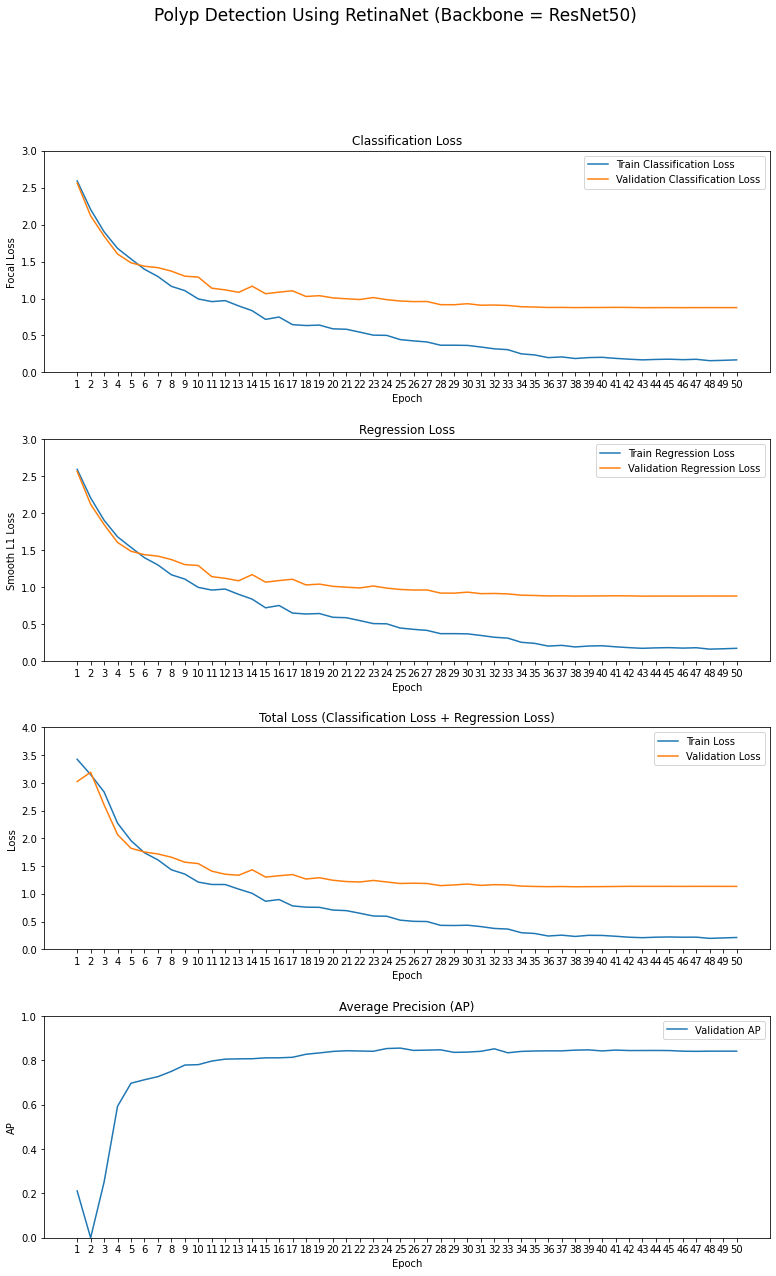

In [13]:
fig = './result/retinanet_resnet50.png'
plot_history(history, fig, 'Polyp Detection Using RetinaNet (Backbone = ResNet50)', epochs)

## With Data Augmentation

In [14]:
training_model_aug, prediction_model_aug = create_models(backbone_retinanet=backbone.retinanet,
                                          num_classes=1,
                                          weights=weights,
                                          freeze_backbone=True,
                                          lr=lr)

In [15]:
transform_generator = random_transform_generator(
            min_rotation=-0.1,
            max_rotation=0.1,
            min_scaling=(0.9, 0.9),
            max_scaling=(1.1, 1.1),
            flip_x_chance=0.5,
            flip_y_chance=0.5,
        )
visual_effect_generator = random_visual_effect_generator(
            contrast_range=(0.9, 1.1),
            brightness_range=(-.1, .1),
        )

In [16]:
train_generator_aug = CSVGenerator(
    csv_data_file='./dataset/train.csv',
    csv_class_file='./dataset/class.csv',
    no_resize = True,
    preprocess_image  = backbone.preprocess_image,
    transform_generator=transform_generator,
    visual_effect_generator=visual_effect_generator
)

In [17]:
model_path_aug = './result/retinanet_resnet50_aug.h5'
log_file_aug = './result/retinanet_resnet50_aug_log.csv'
callback_aug = create_callbacks(training_model_aug, prediction_model_aug, val_generator, model_path_aug, log_file_aug)

In [18]:
history_aug = training_model_aug.fit(
                x=train_generator_aug,
                epochs=epochs,
                verbose=1,
                validation_data=val_generator,
                callbacks=callback_aug,
                steps_per_epoch = steps
                )

Epoch 1/50
400/400 [==============================] - ETA: 0s - loss: 3.3968 - regression_loss: 2.5311 - classification_loss: 0.8657WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0070s vs `on_test_batch_end` time: 0.0259s). Check your callbacks.


Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:09 Time:  0:00:09
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.0000
mAP: 0.0000

Epoch 00001: mAP improved from -inf to 0.00000, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 44s 111ms/step - loss: 3.3968 - regression_loss: 2.5311 - classification_loss: 0.8657 - val_loss: 3.5501 - val_regression_loss: 2.4519 - val_classification_loss: 1.0982
Epoch 2/50
400/400 [==============================] - ETA: 0s - loss: 3.3961 - regression_loss: 2.3092 - classification_loss: 1.0869

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.0000
mAP: 0.0000

Epoch 00002: mAP did not improve from 0.00000
400/400 [==============================] - 41s 102ms/step - loss: 3.3961 - regression_loss: 2.3092 - classification_loss: 1.0869 - val_loss: 3.2917 - val_regression_loss: 2.2163 - val_classification_loss: 1.0754
Epoch 3/50
400/400 [==============================] - ETA: 0s - loss: 3.1191 - regression_loss: 2.0840 - classification_loss: 1.0351

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.0000
mAP: 0.0000

Epoch 00003: mAP did not improve from 0.00000
400/400 [==============================] - 41s 103ms/step - loss: 3.1191 - regression_loss: 2.0840 - classification_loss: 1.0351 - val_loss: 2.9118 - val_regression_loss: 1.8701 - val_classification_loss: 1.0417
Epoch 4/50
400/400 [==============================] - ETA: 0s - loss: 2.8414 - regression_loss: 1.8280 - classification_loss: 1.0133

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.0000
mAP: 0.0000

Epoch 00004: mAP did not improve from 0.00000
400/400 [==============================] - 41s 104ms/step - loss: 2.8414 - regression_loss: 1.8280 - classification_loss: 1.0133 - val_loss: 2.7251 - val_regression_loss: 1.7185 - val_classification_loss: 1.0066
Epoch 5/50
400/400 [==============================] - ETA: 0s - loss: 2.5899 - regression_loss: 1.6881 - classification_loss: 0.9018

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.0000
mAP: 0.0000

Epoch 00005: mAP did not improve from 0.00000
400/400 [==============================] - 42s 104ms/step - loss: 2.5899 - regression_loss: 1.6881 - classification_loss: 0.9018 - val_loss: 2.7137 - val_regression_loss: 1.7615 - val_classification_loss: 0.9522
Epoch 6/50
400/400 [==============================] - ETA: 0s - loss: 2.5413 - regression_loss: 1.6171 - classification_loss: 0.9242

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.0000
mAP: 0.0000

Epoch 00006: mAP did not improve from 0.00000
400/400 [==============================] - 42s 104ms/step - loss: 2.5413 - regression_loss: 1.6171 - classification_loss: 0.9242 - val_loss: 2.4697 - val_regression_loss: 1.5206 - val_classification_loss: 0.9491
Epoch 7/50
400/400 [==============================] - ETA: 0s - loss: 2.2802 - regression_loss: 1.5425 - classification_loss: 0.7377

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.3722
mAP: 0.3722

Epoch 00007: mAP improved from 0.00000 to 0.37219, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 43s 107ms/step - loss: 2.2802 - regression_loss: 1.5425 - classification_loss: 0.7377 - val_loss: 2.0857 - val_regression_loss: 1.4357 - val_classification_loss: 0.6500
Epoch 8/50
400/400 [==============================] - ETA: 0s - loss: 1.9614 - regression_loss: 1.4323 - classification_loss: 0.5290

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.6053
mAP: 0.6053

Epoch 00008: mAP improved from 0.37219 to 0.60528, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 43s 108ms/step - loss: 1.9614 - regression_loss: 1.4323 - classification_loss: 0.5290 - val_loss: 1.8495 - val_regression_loss: 1.3669 - val_classification_loss: 0.4826
Epoch 9/50
400/400 [==============================] - ETA: 0s - loss: 1.8419 - regression_loss: 1.4282 - classification_loss: 0.4137

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.6817
mAP: 0.6817

Epoch 00009: mAP improved from 0.60528 to 0.68168, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 43s 108ms/step - loss: 1.8419 - regression_loss: 1.4282 - classification_loss: 0.4137 - val_loss: 1.7514 - val_regression_loss: 1.3875 - val_classification_loss: 0.3639
Epoch 10/50
400/400 [==============================] - ETA: 0s - loss: 1.6947 - regression_loss: 1.3229 - classification_loss: 0.3717

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.6288
mAP: 0.6288

Epoch 00010: mAP did not improve from 0.68168
400/400 [==============================] - 42s 106ms/step - loss: 1.6947 - regression_loss: 1.3229 - classification_loss: 0.3717 - val_loss: 1.7804 - val_regression_loss: 1.3753 - val_classification_loss: 0.4052
Epoch 11/50
400/400 [==============================] - ETA: 0s - loss: 1.6136 - regression_loss: 1.2792 - classification_loss: 0.3344

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7650
mAP: 0.7650

Epoch 00011: mAP improved from 0.68168 to 0.76496, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 43s 108ms/step - loss: 1.6136 - regression_loss: 1.2792 - classification_loss: 0.3344 - val_loss: 1.6942 - val_regression_loss: 1.2669 - val_classification_loss: 0.4273
Epoch 12/50
400/400 [==============================] - ETA: 0s - loss: 1.6292 - regression_loss: 1.2763 - classification_loss: 0.3529

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7561
mAP: 0.7561

Epoch 00012: mAP did not improve from 0.76496
400/400 [==============================] - 42s 105ms/step - loss: 1.6292 - regression_loss: 1.2763 - classification_loss: 0.3529 - val_loss: 1.6128 - val_regression_loss: 1.2782 - val_classification_loss: 0.3346
Epoch 13/50
400/400 [==============================] - ETA: 0s - loss: 1.5696 - regression_loss: 1.2379 - classification_loss: 0.3318

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7461
mAP: 0.7461

Epoch 00013: mAP did not improve from 0.76496
400/400 [==============================] - 42s 106ms/step - loss: 1.5696 - regression_loss: 1.2379 - classification_loss: 0.3318 - val_loss: 1.6852 - val_regression_loss: 1.3736 - val_classification_loss: 0.3116
Epoch 14/50
400/400 [==============================] - ETA: 0s - loss: 1.5075 - regression_loss: 1.2145 - classification_loss: 0.2931

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:09 Time:  0:00:09
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7080
mAP: 0.7080

Epoch 00014: mAP did not improve from 0.76496
400/400 [==============================] - 42s 105ms/step - loss: 1.5075 - regression_loss: 1.2145 - classification_loss: 0.2931 - val_loss: 1.7626 - val_regression_loss: 1.3757 - val_classification_loss: 0.3869
Epoch 15/50
400/400 [==============================] - ETA: 0s - loss: 1.4966 - regression_loss: 1.2048 - classification_loss: 0.2918

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7562
mAP: 0.7562

Epoch 00015: mAP did not improve from 0.76496
400/400 [==============================] - 41s 103ms/step - loss: 1.4966 - regression_loss: 1.2048 - classification_loss: 0.2918 - val_loss: 1.5031 - val_regression_loss: 1.2159 - val_classification_loss: 0.2872
Epoch 16/50
400/400 [==============================] - ETA: 0s - loss: 1.4327 - regression_loss: 1.1468 - classification_loss: 0.2858

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7545
mAP: 0.7545

Epoch 00016: mAP did not improve from 0.76496
400/400 [==============================] - 41s 102ms/step - loss: 1.4327 - regression_loss: 1.1468 - classification_loss: 0.2858 - val_loss: 1.4948 - val_regression_loss: 1.1892 - val_classification_loss: 0.3056
Epoch 17/50
400/400 [==============================] - ETA: 0s - loss: 1.4383 - regression_loss: 1.1101 - classification_loss: 0.3281

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7792
mAP: 0.7792

Epoch 00017: mAP improved from 0.76496 to 0.77918, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 43s 107ms/step - loss: 1.4383 - regression_loss: 1.1101 - classification_loss: 0.3281 - val_loss: 1.3894 - val_regression_loss: 1.1266 - val_classification_loss: 0.2628
Epoch 18/50
400/400 [==============================] - ETA: 0s - loss: 1.4463 - regression_loss: 1.1467 - classification_loss: 0.2997

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8006
mAP: 0.8006

Epoch 00018: mAP improved from 0.77918 to 0.80059, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 43s 107ms/step - loss: 1.4463 - regression_loss: 1.1467 - classification_loss: 0.2997 - val_loss: 1.4391 - val_regression_loss: 1.1646 - val_classification_loss: 0.2745
Epoch 19/50
400/400 [==============================] - ETA: 0s - loss: 1.3997 - regression_loss: 1.1300 - classification_loss: 0.2697

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.7908
mAP: 0.7908

Epoch 00019: mAP did not improve from 0.80059
400/400 [==============================] - 41s 103ms/step - loss: 1.3997 - regression_loss: 1.1300 - classification_loss: 0.2697 - val_loss: 1.4068 - val_regression_loss: 1.1353 - val_classification_loss: 0.2715
Epoch 20/50
400/400 [==============================] - ETA: 0s - loss: 1.2747 - regression_loss: 1.0470 - classification_loss: 0.2276

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8159
mAP: 0.8159

Epoch 00020: mAP improved from 0.80059 to 0.81594, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 42s 106ms/step - loss: 1.2747 - regression_loss: 1.0470 - classification_loss: 0.2276 - val_loss: 1.3718 - val_regression_loss: 1.1218 - val_classification_loss: 0.2500
Epoch 21/50
400/400 [==============================] - ETA: 0s - loss: 1.2644 - regression_loss: 1.0294 - classification_loss: 0.2349

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8266
mAP: 0.8266

Epoch 00021: mAP improved from 0.81594 to 0.82664, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 43s 107ms/step - loss: 1.2644 - regression_loss: 1.0294 - classification_loss: 0.2349 - val_loss: 1.3531 - val_regression_loss: 1.1150 - val_classification_loss: 0.2381
Epoch 22/50
400/400 [==============================] - ETA: 0s - loss: 1.2741 - regression_loss: 1.0412 - classification_loss: 0.2328

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8183
mAP: 0.8183

Epoch 00022: mAP did not improve from 0.82664
400/400 [==============================] - 41s 103ms/step - loss: 1.2741 - regression_loss: 1.0412 - classification_loss: 0.2328 - val_loss: 1.3667 - val_regression_loss: 1.1360 - val_classification_loss: 0.2307
Epoch 23/50
400/400 [==============================] - ETA: 0s - loss: 1.2693 - regression_loss: 1.0409 - classification_loss: 0.2284

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8180
mAP: 0.8180

Epoch 00023: mAP did not improve from 0.82664
400/400 [==============================] - 41s 102ms/step - loss: 1.2693 - regression_loss: 1.0409 - classification_loss: 0.2284 - val_loss: 1.3939 - val_regression_loss: 1.1615 - val_classification_loss: 0.2324
Epoch 24/50
400/400 [==============================] - ETA: 0s - loss: 1.1627 - regression_loss: 0.9547 - classification_loss: 0.2081

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8090
mAP: 0.8090

Epoch 00024: mAP did not improve from 0.82664
400/400 [==============================] - 41s 102ms/step - loss: 1.1627 - regression_loss: 0.9547 - classification_loss: 0.2081 - val_loss: 1.3782 - val_regression_loss: 1.1353 - val_classification_loss: 0.2430
Epoch 25/50
400/400 [==============================] - ETA: 0s - loss: 1.2576 - regression_loss: 1.0287 - classification_loss: 0.2288

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8112
mAP: 0.8112

Epoch 00025: mAP did not improve from 0.82664
400/400 [==============================] - 41s 102ms/step - loss: 1.2576 - regression_loss: 1.0287 - classification_loss: 0.2288 - val_loss: 1.4582 - val_regression_loss: 1.2189 - val_classification_loss: 0.2393
Epoch 26/50
400/400 [==============================] - ETA: 0s - loss: 1.0870 - regression_loss: 0.8911 - classification_loss: 0.1960

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8262
mAP: 0.8262

Epoch 00026: mAP did not improve from 0.82664
400/400 [==============================] - 41s 102ms/step - loss: 1.0870 - regression_loss: 0.8911 - classification_loss: 0.1960 - val_loss: 1.3248 - val_regression_loss: 1.0933 - val_classification_loss: 0.2315
Epoch 27/50
400/400 [==============================] - ETA: 0s - loss: 1.2022 - regression_loss: 0.9851 - classification_loss: 0.2171

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8409
mAP: 0.8409

Epoch 00027: mAP improved from 0.82664 to 0.84087, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 42s 106ms/step - loss: 1.2022 - regression_loss: 0.9851 - classification_loss: 0.2171 - val_loss: 1.3658 - val_regression_loss: 1.1474 - val_classification_loss: 0.2184
Epoch 28/50
400/400 [==============================] - ETA: 0s - loss: 1.1156 - regression_loss: 0.9102 - classification_loss: 0.2054

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8361
mAP: 0.8361

Epoch 00028: mAP did not improve from 0.84087
400/400 [==============================] - 41s 102ms/step - loss: 1.1156 - regression_loss: 0.9102 - classification_loss: 0.2054 - val_loss: 1.2789 - val_regression_loss: 1.0643 - val_classification_loss: 0.2146
Epoch 29/50
400/400 [==============================] - ETA: 0s - loss: 1.1478 - regression_loss: 0.9368 - classification_loss: 0.2110

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8313
mAP: 0.8313

Epoch 00029: mAP did not improve from 0.84087
400/400 [==============================] - 41s 102ms/step - loss: 1.1478 - regression_loss: 0.9368 - classification_loss: 0.2110 - val_loss: 1.2754 - val_regression_loss: 1.0508 - val_classification_loss: 0.2247
Epoch 30/50
400/400 [==============================] - ETA: 0s - loss: 1.1210 - regression_loss: 0.9228 - classification_loss: 0.1982

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8430
mAP: 0.8430

Epoch 00030: mAP improved from 0.84087 to 0.84303, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 42s 106ms/step - loss: 1.1210 - regression_loss: 0.9228 - classification_loss: 0.1982 - val_loss: 1.2023 - val_regression_loss: 0.9850 - val_classification_loss: 0.2173
Epoch 31/50
400/400 [==============================] - ETA: 0s - loss: 1.1260 - regression_loss: 0.9211 - classification_loss: 0.2049

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8232
mAP: 0.8232

Epoch 00031: mAP did not improve from 0.84303
400/400 [==============================] - 41s 102ms/step - loss: 1.1260 - regression_loss: 0.9211 - classification_loss: 0.2049 - val_loss: 1.3510 - val_regression_loss: 1.1123 - val_classification_loss: 0.2387
Epoch 32/50
400/400 [==============================] - ETA: 0s - loss: 1.1032 - regression_loss: 0.9076 - classification_loss: 0.1955

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8474
mAP: 0.8474

Epoch 00032: mAP improved from 0.84303 to 0.84742, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 42s 106ms/step - loss: 1.1032 - regression_loss: 0.9076 - classification_loss: 0.1955 - val_loss: 1.2511 - val_regression_loss: 1.0298 - val_classification_loss: 0.2213
Epoch 33/50
400/400 [==============================] - ETA: 0s - loss: 1.0731 - regression_loss: 0.8781 - classification_loss: 0.1949

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8511
mAP: 0.8511

Epoch 00033: mAP improved from 0.84742 to 0.85114, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 42s 106ms/step - loss: 1.0731 - regression_loss: 0.8781 - classification_loss: 0.1949 - val_loss: 1.2263 - val_regression_loss: 1.0205 - val_classification_loss: 0.2058
Epoch 34/50
400/400 [==============================] - ETA: 0s - loss: 1.0593 - regression_loss: 0.8709 - classification_loss: 0.1884

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8523
mAP: 0.8523

Epoch 00034: mAP improved from 0.85114 to 0.85227, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 42s 106ms/step - loss: 1.0593 - regression_loss: 0.8709 - classification_loss: 0.1884 - val_loss: 1.2823 - val_regression_loss: 1.0657 - val_classification_loss: 0.2166
Epoch 35/50
400/400 [==============================] - ETA: 0s - loss: 1.0241 - regression_loss: 0.8450 - classification_loss: 0.1791

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8597
mAP: 0.8597

Epoch 00035: mAP improved from 0.85227 to 0.85975, saving model to ./result\retinanet_resnet50_aug.h5

Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
400/400 [==============================] - 42s 106ms/step - loss: 1.0241 - regression_loss: 0.8450 - classification_loss: 0.1791 - val_loss: 1.3114 - val_regression_loss: 1.1011 - val_classification_loss: 0.2104
Epoch 36/50
400/400 [==============================] - ETA: 0s - loss: 1.0473 - regression_loss: 0.8588 - classification_loss: 0.1885

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8580
mAP: 0.8580

Epoch 00036: mAP did not improve from 0.85975
400/400 [==============================] - 41s 102ms/step - loss: 1.0473 - regression_loss: 0.8588 - classification_loss: 0.1885 - val_loss: 1.2311 - val_regression_loss: 1.0260 - val_classification_loss: 0.2051
Epoch 37/50
400/400 [==============================] - ETA: 0s - loss: 0.9521 - regression_loss: 0.7872 - classification_loss: 0.1649

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8602
mAP: 0.8602

Epoch 00037: mAP improved from 0.85975 to 0.86017, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 42s 105ms/step - loss: 0.9521 - regression_loss: 0.7872 - classification_loss: 0.1649 - val_loss: 1.1833 - val_regression_loss: 0.9811 - val_classification_loss: 0.2022
Epoch 38/50
400/400 [==============================] - ETA: 0s - loss: 0.9395 - regression_loss: 0.7761 - classification_loss: 0.1634

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8628
mAP: 0.8628

Epoch 00038: mAP improved from 0.86017 to 0.86281, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 42s 106ms/step - loss: 0.9395 - regression_loss: 0.7761 - classification_loss: 0.1634 - val_loss: 1.1712 - val_regression_loss: 0.9732 - val_classification_loss: 0.1979
Epoch 39/50
400/400 [==============================] - ETA: 0s - loss: 0.9405 - regression_loss: 0.7739 - classification_loss: 0.1666

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8621
mAP: 0.8621

Epoch 00039: mAP did not improve from 0.86281
400/400 [==============================] - 41s 102ms/step - loss: 0.9405 - regression_loss: 0.7739 - classification_loss: 0.1666 - val_loss: 1.1895 - val_regression_loss: 0.9939 - val_classification_loss: 0.1956
Epoch 40/50
400/400 [==============================] - ETA: 0s - loss: 0.9450 - regression_loss: 0.7740 - classification_loss: 0.1711

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8616
mAP: 0.8616

Epoch 00040: mAP did not improve from 0.86281
400/400 [==============================] - 41s 102ms/step - loss: 0.9450 - regression_loss: 0.7740 - classification_loss: 0.1711 - val_loss: 1.1560 - val_regression_loss: 0.9616 - val_classification_loss: 0.1944
Epoch 41/50
400/400 [==============================] - ETA: 0s - loss: 0.9006 - regression_loss: 0.7370 - classification_loss: 0.1636

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8633
mAP: 0.8633

Epoch 00041: mAP improved from 0.86281 to 0.86332, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 42s 105ms/step - loss: 0.9006 - regression_loss: 0.7370 - classification_loss: 0.1636 - val_loss: 1.1741 - val_regression_loss: 0.9784 - val_classification_loss: 0.1956
Epoch 42/50
400/400 [==============================] - ETA: 0s - loss: 0.9699 - regression_loss: 0.7888 - classification_loss: 0.1811

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8602
mAP: 0.8602

Epoch 00042: mAP did not improve from 0.86332
400/400 [==============================] - 41s 102ms/step - loss: 0.9699 - regression_loss: 0.7888 - classification_loss: 0.1811 - val_loss: 1.1797 - val_regression_loss: 0.9846 - val_classification_loss: 0.1951
Epoch 43/50
400/400 [==============================] - ETA: 0s - loss: 0.9529 - regression_loss: 0.7858 - classification_loss: 0.1671

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8581
mAP: 0.8581

Epoch 00043: mAP did not improve from 0.86332
400/400 [==============================] - 41s 102ms/step - loss: 0.9529 - regression_loss: 0.7858 - classification_loss: 0.1671 - val_loss: 1.1041 - val_regression_loss: 0.9126 - val_classification_loss: 0.1915
Epoch 44/50
400/400 [==============================] - ETA: 0s - loss: 0.8904 - regression_loss: 0.7274 - classification_loss: 0.1629

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8661
mAP: 0.8661

Epoch 00044: mAP improved from 0.86332 to 0.86610, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 43s 107ms/step - loss: 0.8904 - regression_loss: 0.7274 - classification_loss: 0.1629 - val_loss: 1.1847 - val_regression_loss: 0.9920 - val_classification_loss: 0.1927
Epoch 45/50
400/400 [==============================] - ETA: 0s - loss: 0.9599 - regression_loss: 0.7838 - classification_loss: 0.1761

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8659
mAP: 0.8659

Epoch 00045: mAP did not improve from 0.86610
400/400 [==============================] - 41s 102ms/step - loss: 0.9599 - regression_loss: 0.7838 - classification_loss: 0.1761 - val_loss: 1.1465 - val_regression_loss: 0.9547 - val_classification_loss: 0.1918
Epoch 46/50
400/400 [==============================] - ETA: 0s - loss: 0.9225 - regression_loss: 0.7535 - classification_loss: 0.1690

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8671
mAP: 0.8671

Epoch 00046: mAP improved from 0.86610 to 0.86713, saving model to ./result\retinanet_resnet50_aug.h5
400/400 [==============================] - 42s 106ms/step - loss: 0.9225 - regression_loss: 0.7535 - classification_loss: 0.1690 - val_loss: 1.1283 - val_regression_loss: 0.9371 - val_classification_loss: 0.1912
Epoch 47/50
400/400 [==============================] - ETA: 0s - loss: 0.9039 - regression_loss: 0.7384 - classification_loss: 0.1655

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8613
mAP: 0.8613

Epoch 00047: mAP did not improve from 0.86713
400/400 [==============================] - 41s 102ms/step - loss: 0.9039 - regression_loss: 0.7384 - classification_loss: 0.1655 - val_loss: 1.1355 - val_regression_loss: 0.9436 - val_classification_loss: 0.1920
Epoch 48/50
400/400 [==============================] - ETA: 0s - loss: 0.9121 - regression_loss: 0.7461 - classification_loss: 0.1660

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8675
mAP: 0.8675

Epoch 00048: mAP improved from 0.86713 to 0.86746, saving model to ./result\retinanet_resnet50_aug.h5

Epoch 00048: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
400/400 [==============================] - 42s 106ms/step - loss: 0.9121 - regression_loss: 0.7461 - classification_loss: 0.1660 - val_loss: 1.1741 - val_regression_loss: 0.9789 - val_classification_loss: 0.1952
Epoch 49/50
400/400 [==============================] - ETA: 0s - loss: 0.8402 - regression_loss: 0.6876 - classification_loss: 0.1526

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:09 Time:  0:00:09
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8614
mAP: 0.8614

Epoch 00049: mAP did not improve from 0.86746
400/400 [==============================] - 41s 103ms/step - loss: 0.8402 - regression_loss: 0.6876 - classification_loss: 0.1526 - val_loss: 1.1600 - val_regression_loss: 0.9659 - val_classification_loss: 0.1940
Epoch 50/50
400/400 [==============================] - ETA: 0s - loss: 0.9197 - regression_loss: 0.7473 - classification_loss: 0.1724

Running network: 100% (180 of 180) |#####| Elapsed Time: 0:00:08 Time:  0:00:08
Parsing annotations: 100% (180 of 180) |#| Elapsed Time: 0:00:00 Time:  0:00:00


198 instances of class polyp with average precision: 0.8664
mAP: 0.8664

Epoch 00050: mAP did not improve from 0.86746
400/400 [==============================] - 41s 102ms/step - loss: 0.9197 - regression_loss: 0.7473 - classification_loss: 0.1724 - val_loss: 1.1640 - val_regression_loss: 0.9701 - val_classification_loss: 0.1939


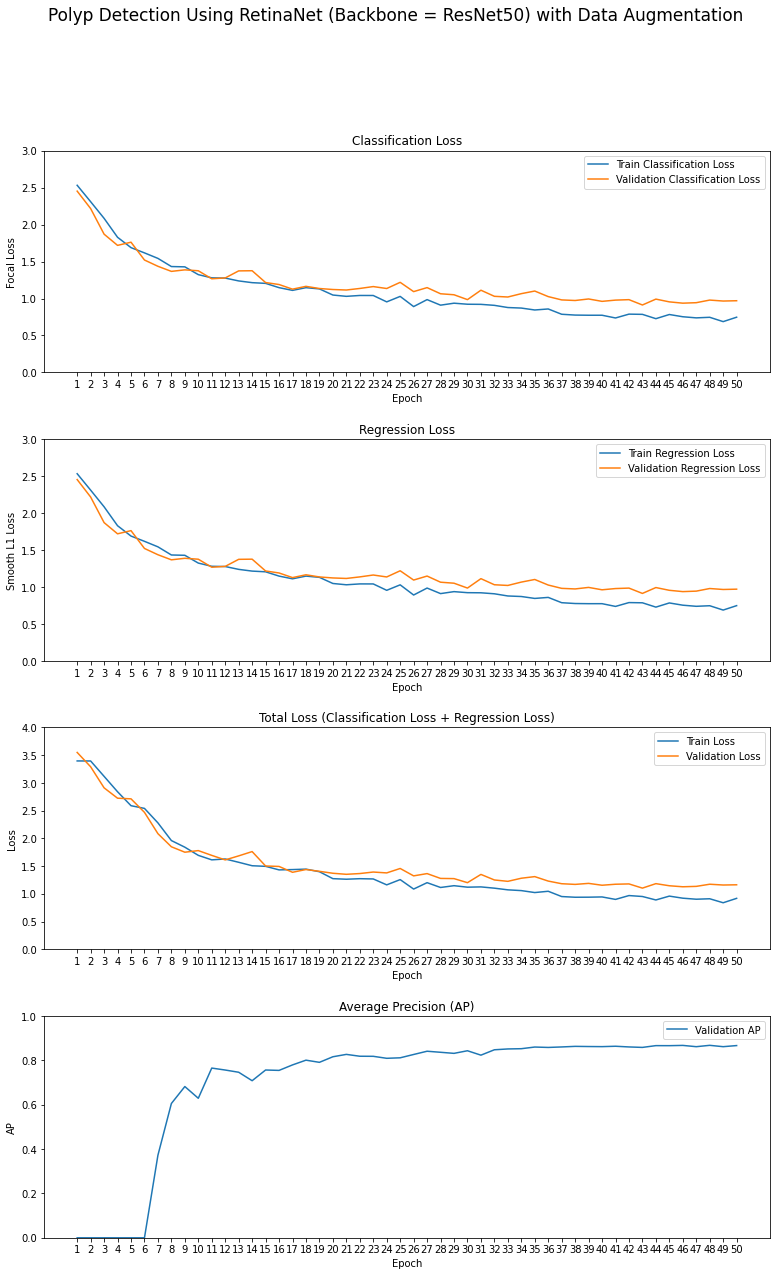

In [19]:
fig = './result/retinanet_resnet50_aug.png'
plot_history(history_aug, fig, 'Polyp Detection Using RetinaNet (Backbone = ResNet50) with Data Augmentation', epochs)